# Data Loading

In [14]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

import warnings
warnings.filterwarnings("ignore")

In [3]:
# fetch dataset 
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597) 

productivity_data = productivity_prediction_of_garment_employees.data
productivity_df = pd.DataFrame(productivity_data['original'])

In [4]:
productivity_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [17]:
def dataframe_info(df):
    report = pd.DataFrame(columns=['Column', 'Data Type', 'Unique Count', 'Unique Sample', 'Missing Values', 'Missing Percentage'])
    for column in df.columns:
        data_type = df[column].dtype
        unique_count = df[column].nunique()
        unique_sample = df[column].unique()[:5]
        missing_values = df[column].isnull().sum()
        missing_percentage = (missing_values / len(df)) * 100
        report = pd.concat([report, pd.DataFrame({'Column': [column],
                                                      'Data Type': [data_type],
                                                      'Unique Count': [unique_count],
                                                      'Unique Sample': [unique_sample],
                                                      'Missing Values': [missing_values],
                                                      'Missing Percentage': [missing_percentage.round(4)]})],
                             ignore_index=True)
    return report

In [18]:
dataframe_info(productivity_df)

,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage
0,date,object,59,"[1/1/2015, 1/3/2015, 1/4/2015, 1/5/2015, 1/6/2...",0,0.0000
1,quarter,object,5,"[Quarter1, Quarter2, Quarter3, Quarter4, Quart...",0,0.0000
2,department,object,2,"[sweing, finishing]",0,0.0000
3,day,object,6,"[Thursday, Saturday, Sunday, Monday, Tuesday]",0,0.0000
4,team,int64,12,"[8, 1, 11, 12, 6]",0,0.0000
5,targeted_productivity,float64,9,"[0.8, 0.75, 0.7, 0.65, 0.6]",0,0.0000
6,smv,float64,70,"[26.16, 3.94, 11.41, 25.9, 28.08]",0,0.0000
7,wip,float64,548,"[1108.0, nan, 968.0, 1170.0, 984.0]",506,42.2723
8,over_time,int64,143,"[7080, 960, 3660, 1920, 6720]",0,0.0000
9,incentive,int64,48,"[98, 0, 50, 38, 45]",0,0.0000


In [21]:
len(productivity_df)

1197

In [19]:
#change date to datetime data type
productivity_df['date'] = pd.to_datetime(productivity_df['date'])

# EDA

## Univariate

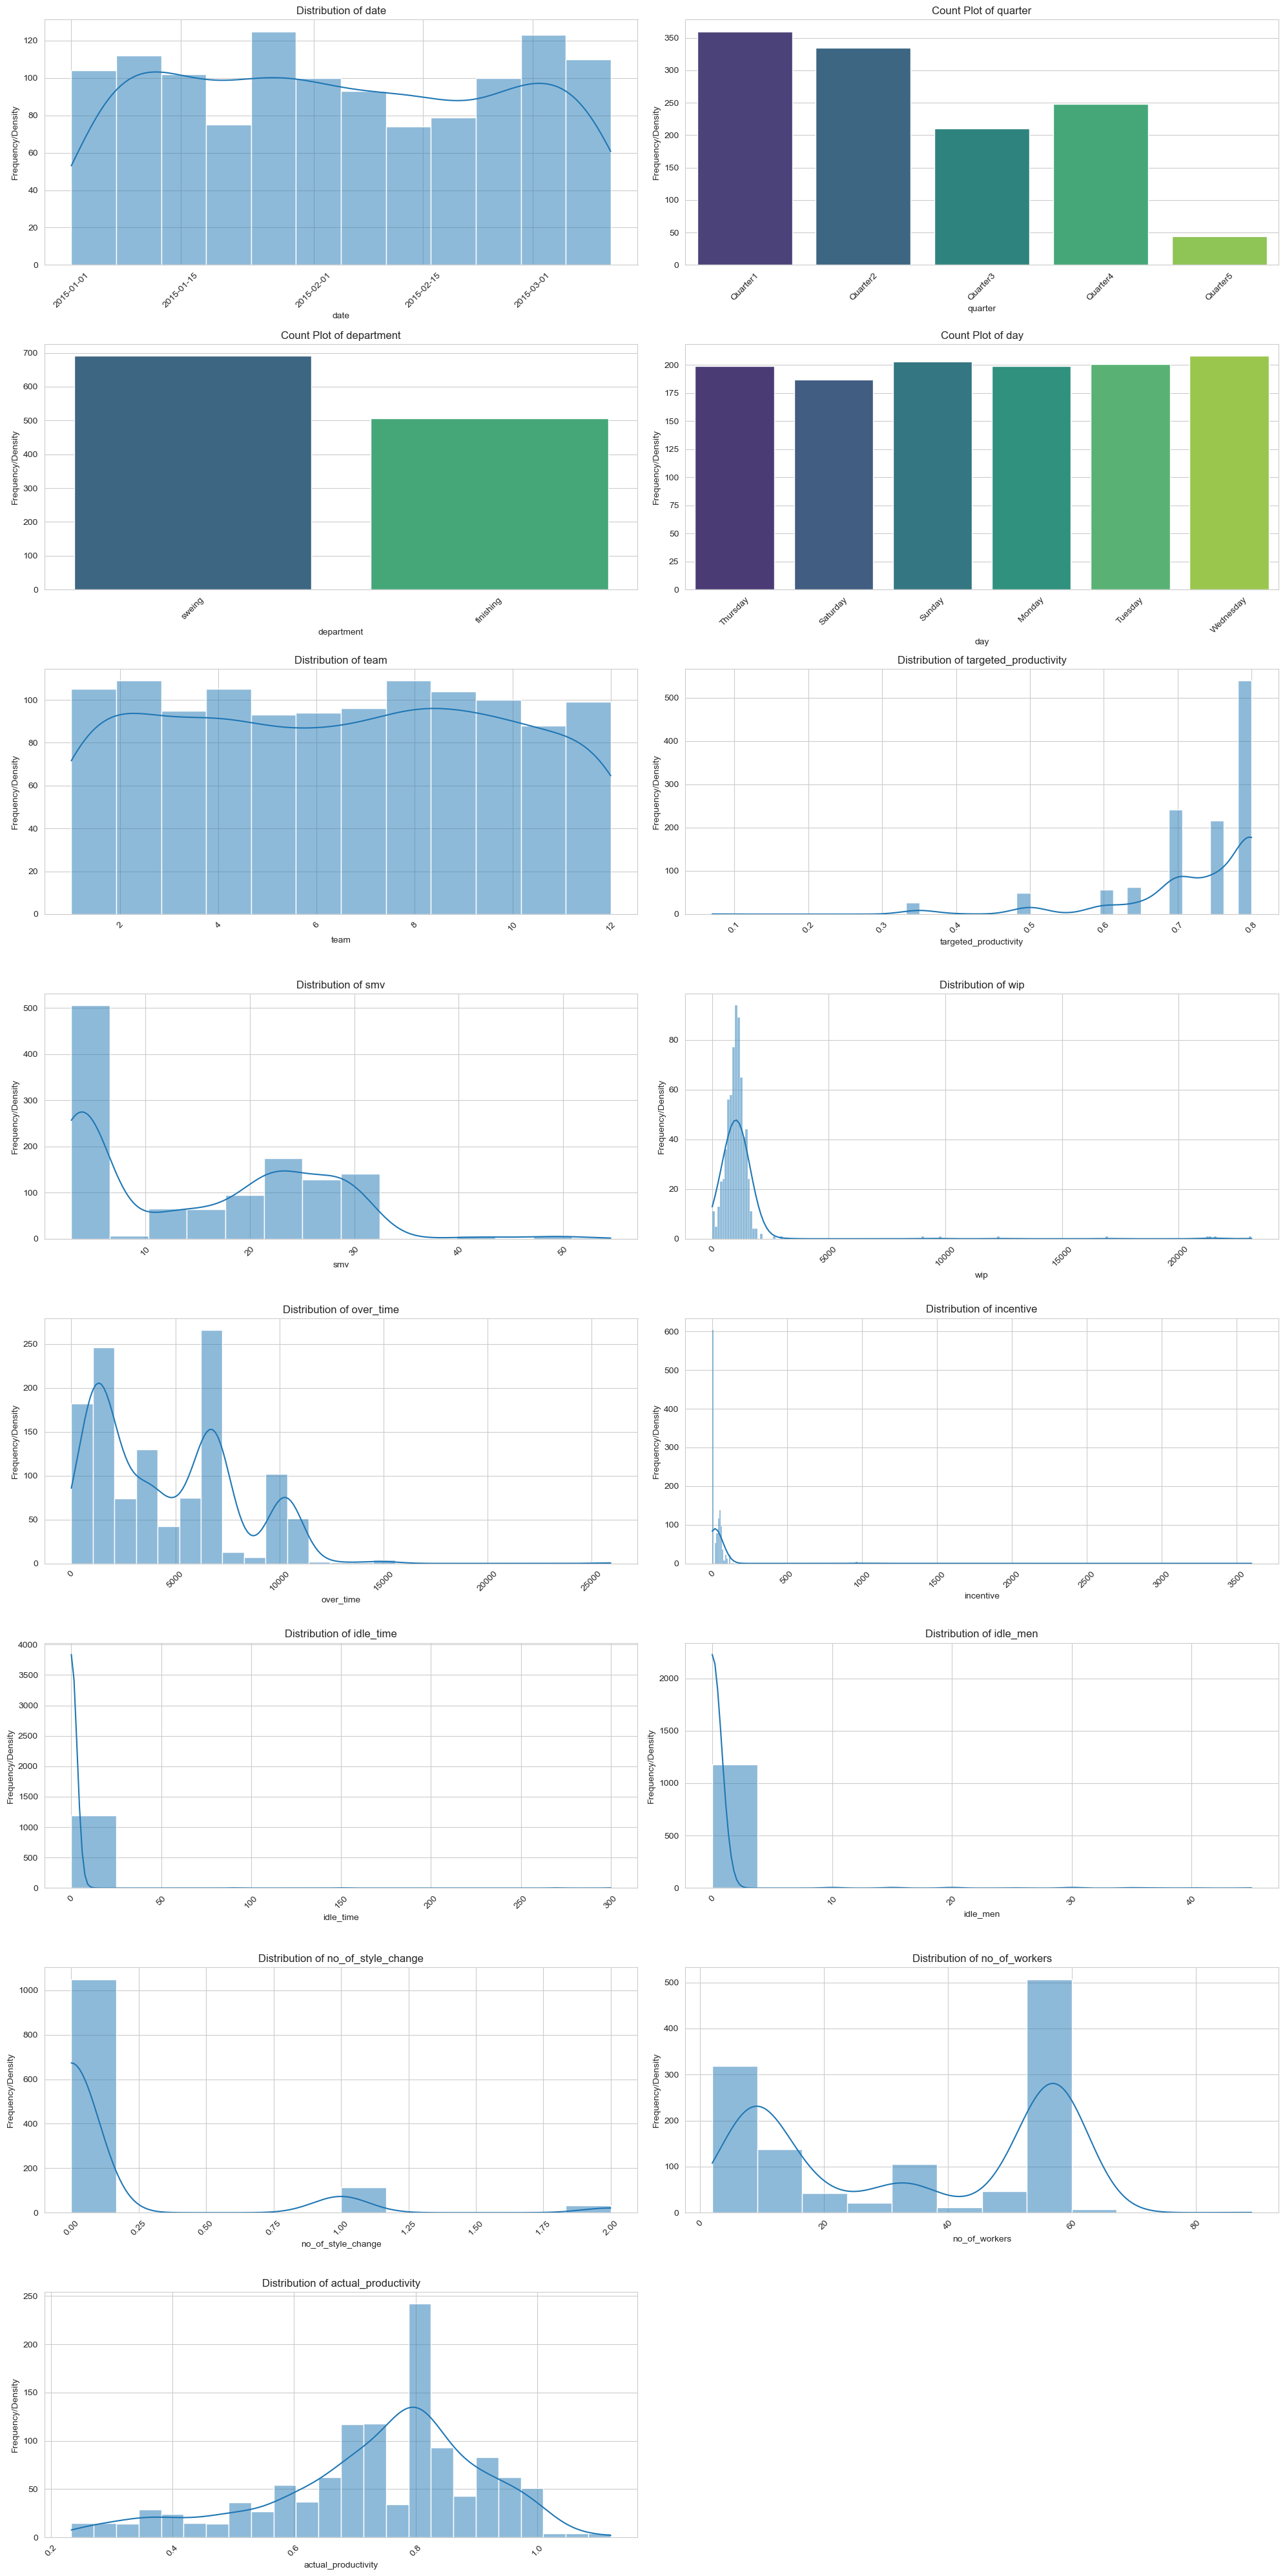

In [26]:
# Function to perform and plot univariate analysis
def univariate_analysis(df, columns_to_analyze=None, figsize=None):
    """
    This function performs univariate analysis for specified or all columns in a DataFrame. 
    It generates appropriate plots (countplot for categorical, histplot for numerical) and displays them in a grid layout.

    Parameters:
        df (pandas.DataFrame): The DataFrame to analyze.
        columns_to_analyze (list, optional): A list of column names to analyze. If None, analyzes all columns.
        figsize (tuple, optional): The size of the figure to display the plots (width, height).

    Returns:
        None: Displays the plots.
    """
    
    # Set the aesthetic style of the plots (optional)
    sns.set_style("whitegrid")

    # If no specific columns are provided, analyze all
    if columns_to_analyze is None:
        columns_to_analyze = df.columns

    if figsize is None:
        figsize = (20, 5 * ((len(columns_to_analyze) + 1) // 2))

    # Calculate number of rows and columns for the subplot grid
    num_plots = len(columns_to_analyze)
    num_rows = (num_plots + 1) // 2
    num_cols = 2

    # Create the subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the array for easy iteration

    # Function for individual plot generation
    def plot_single_variable(data, column, ax):
        if data[column].dtype == 'object':
            sns.countplot(data=data, x=column, palette='viridis', ax=ax)
            ax.set_title(f'Count Plot of {column}')
        else:
            sns.histplot(data[column], kde=True, ax=ax)
            ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency/Density')
        ax.tick_params(axis='x', rotation=45)

    # Generate plots for each column
    for i, column in enumerate(columns_to_analyze):
        plot_single_variable(df, column, axes[i])

    # Remove any extra empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better readability
    plt.tight_layout()

    # Show the plots
    plt.show()

univariate_analysis(productivity_df)

## Understanding Quarters

In [22]:
# Calculate the number of unique days
num_days = productivity_df['date'].nunique()

# Get the date range
start_date = productivity_df['date'].min()
end_date = productivity_df['date'].max()

# Calculate the total date range
date_range = end_date - start_date

print(f"The data covers {num_days} unique days.")
print(f"Date range: from {start_date.date()} to {end_date.date()}")
print(f"Total time span: {date_range.days + 1} days")

The data covers 59 unique days.
Date range: from 2015-01-01 to 2015-03-11
Total time span: 70 days


In [23]:
# Check the unique values in the 'quarter' column
print("Unique quarters:", productivity_df['quarter'].unique())

# Count the occurrences of each quarter
print("\nQuarter counts:")
print(productivity_df['quarter'].value_counts())

# Check if there are any gaps in the date range
all_dates = pd.date_range(start=start_date, end=end_date)
missing_dates = all_dates.difference(productivity_df['date'])

print(f"\nNumber of days without data: {len(missing_dates)}")
print("Sample of missing dates:")
print(missing_dates[:5])  # Print first 5 missing dates as a sample

# Check the distribution of data across days of the week
print("\nData distribution across days of the week:")
print(productivity_df['day'].value_counts())

Unique quarters: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

Quarter counts:
quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Number of days without data: 11
Sample of missing dates:
DatetimeIndex(['2015-01-02', '2015-01-09', '2015-01-16', '2015-01-23',
               '2015-01-30'],
              dtype='datetime64[ns]', freq=None)

Data distribution across days of the week:
day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64


In [24]:
# Group by quarter and get the date range for each
quarter_ranges = productivity_df.groupby('quarter').agg({
    'date': ['min', 'max']
})

# Flatten the column names
quarter_ranges.columns = ['start_date', 'end_date']

# Sort by start date to see the progression
quarter_ranges = quarter_ranges.sort_values('start_date')

# Calculate the number of days in each quarter
quarter_ranges['days'] = (quarter_ranges['end_date'] - quarter_ranges['start_date']).dt.days + 1

# Calculate the number of data points in each quarter
quarter_counts = productivity_df['quarter'].value_counts().sort_index()

# Add the count to our results
quarter_ranges['data_points'] = quarter_counts

print("Quarter Date Ranges:")
print(quarter_ranges)

# Calculate any gaps between quarters
gaps = []
for i in range(len(quarter_ranges) - 1):
    current_end = quarter_ranges.iloc[i]['end_date']
    next_start = quarter_ranges.iloc[i+1]['start_date']
    gap = (next_start - current_end).days - 1
    if gap > 0:
        gaps.append(f"Gap of {gap} days between {quarter_ranges.index[i]} and {quarter_ranges.index[i+1]}")

if gaps:
    print("\nGaps between quarters:")
    for gap in gaps:
        print(gap)
else:
    print("\nNo gaps between quarters.")

Quarter Date Ranges:
         start_date   end_date  days  data_points
quarter                                          
Quarter1 2015-01-01 2015-03-07    66          360
Quarter2 2015-01-08 2015-03-11    63          335
Quarter3 2015-01-15 2015-02-19    36          210
Quarter4 2015-01-22 2015-02-28    38          248
Quarter5 2015-01-29 2015-01-31     3           44

No gaps between quarters.


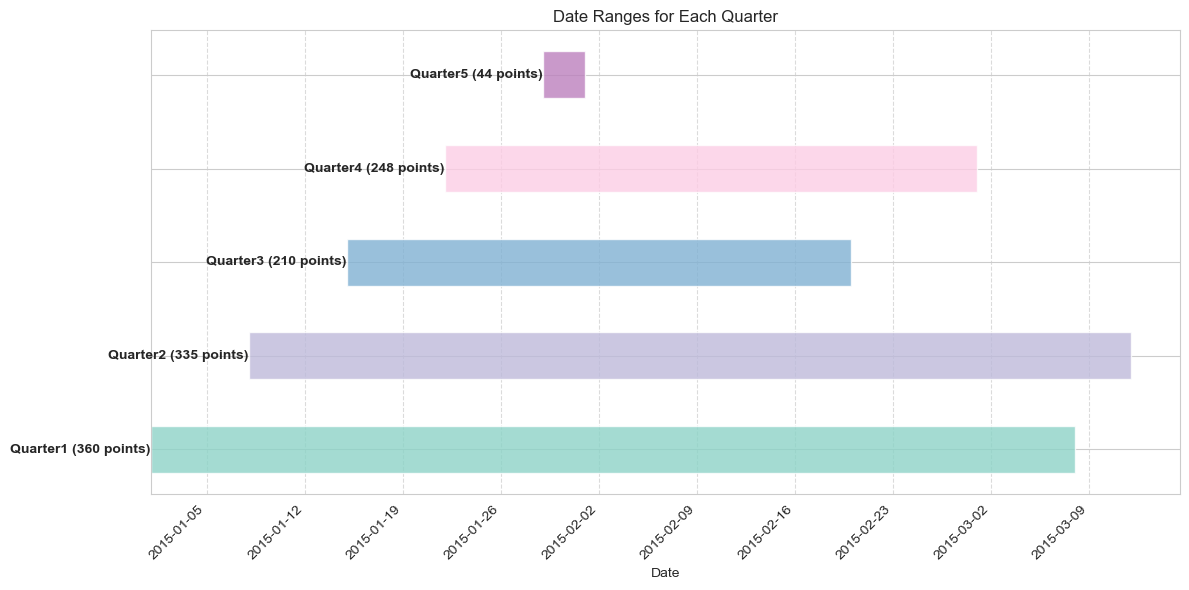

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure quarter_ranges is sorted by start_date
quarter_ranges = quarter_ranges.sort_values('start_date')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot horizontal bars for each quarter
for i, (quarter, row) in enumerate(quarter_ranges.iterrows()):
    ax.barh(i, (row['end_date'] - row['start_date']).days + 1, 
            left=mdates.date2num(row['start_date']), 
            height=0.5, 
            align='center',
            color=plt.cm.Set3(i / len(quarter_ranges)),
            alpha=0.8)
    
    # Add text labels
    ax.text(mdates.date2num(row['start_date']), i, 
            f"{quarter} ({row['data_points']} points)", 
            va='center', ha='right', fontweight='bold')

# Customize the plot
ax.set_yticks(range(len(quarter_ranges)))
ax.set_yticklabels([])
ax.set_xlabel('Date')
ax.set_title('Date Ranges for Each Quarter')

# Format x-axis to show dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
ax.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

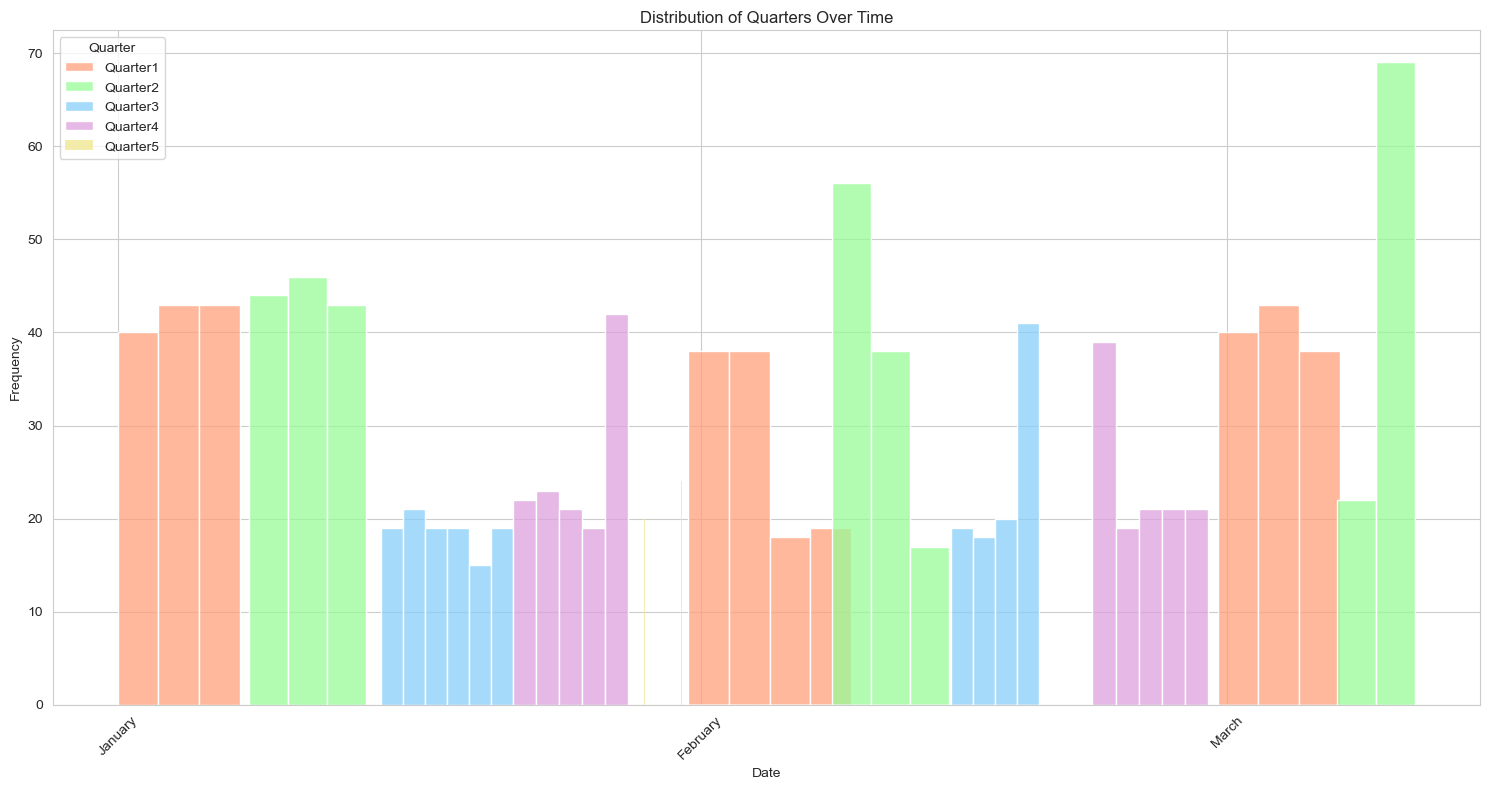

Date range of each quarter:
Quarter1: 2015-01-01 to 2015-03-07
Quarter2: 2015-01-08 to 2015-03-11
Quarter3: 2015-01-15 to 2015-02-19
Quarter4: 2015-01-22 to 2015-02-28
Quarter5: 2015-01-29 to 2015-01-31


In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns

# Ensure the date is in datetime format
productivity_df['date'] = pd.to_datetime(productivity_df['date'])

# Create the plot
plt.figure(figsize=(15, 8))

# Define colors for quarters
color_map = {'Quarter1': '#FFA07A', 'Quarter2': '#98FB98', 'Quarter3': '#87CEFA', 
             'Quarter4': '#DDA0DD', 'Quarter5': '#F0E68C'}

# Create histograms for each quarter
for quarter in sorted(productivity_df['quarter'].unique()):
    quarter_data = productivity_df[productivity_df['quarter'] == quarter]
    sns.histplot(data=quarter_data, x='date', bins=30, 
                 color=color_map[quarter], label=quarter, 
                 kde=False, element="bars")

plt.title('Distribution of Quarters Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Format x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xticks(rotation=45)

plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

# Print some additional information
print("Date range of each quarter:")
for quarter in sorted(productivity_df['quarter'].unique()):
    quarter_data = productivity_df[productivity_df['quarter'] == quarter]
    print(f"{quarter}: {quarter_data['date'].min().strftime('%Y-%m-%d')} to {quarter_data['date'].max().strftime('%Y-%m-%d')}")

In [37]:
# Change 'Quarter5' to 'Quarter4' 
productivity_df['quarter'] = productivity_df['quarter'].replace('Quarter5', 'Quarter4')

## Investigate missingness on wip

In [38]:
productivity_df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# Data Splitting

In [5]:
X = productivity_prediction_of_garment_employees.data.features 
y = productivity_prediction_of_garment_employees.data.targets 
  
# metadata 
print(productivity_prediction_of_garment_employees.metadata) 
  
# variable information 
print(productivity_prediction_of_garment_employees.variables) 


{'uci_id': 597, 'name': 'Productivity Prediction of Garment Employees', 'repository_url': 'https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees', 'data_url': 'https://archive.ics.uci.edu/static/public/597/data.csv', 'abstract': 'This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts.', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 1197, 'num_features': 14, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['actual_productivity'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51S6D', 'creators': [], 'intro_paper': {'title': 'Mining the productivity data of the garment industry', '